# HR Analysis

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company.<br> Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.<br> Information related to demographics, education, experience are in hands from candidates signup and enrollment.

Columns discription:

- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In this file we go through this steps for data analysis and make dataset ready:
- load and check data
- basic analysis
- missing values (find and fill)
- feature engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/aug_train.csv')
test = pd.read_csv('dataset/aug_test.csv')

In [3]:
data.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [4]:
print('shape of data : ', data.shape)
print('-'*50)
data.info()
print('-'*50)
print('number of unique values:')
print(data.nunique())

shape of data :  (19158, 14)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target     

In [5]:
# split numerical features from objects
num_data = data.select_dtypes(exclude='object')
cat_data = data.select_dtypes(include='object')

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


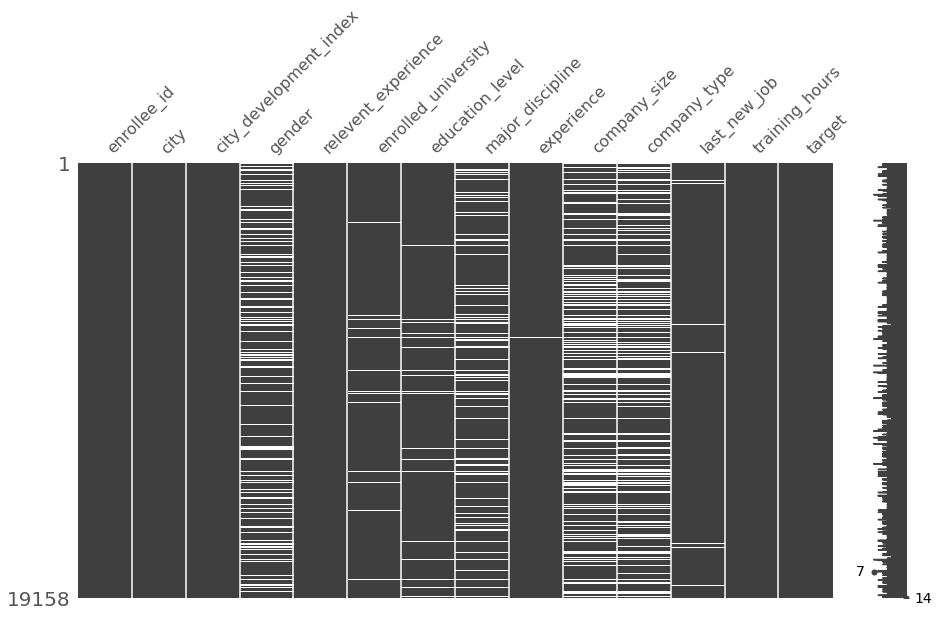

In [6]:
# check for null values
print(data.isnull().sum())
# plot null values in a visualize matrix
msno.matrix(data, figsize=(15,8))
plt.show()

## Simple data analysis

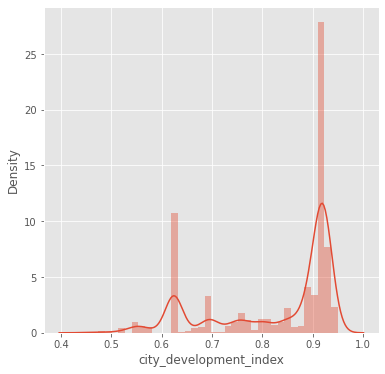

In [7]:
# first distributions on numeric datas
plt.figure(figsize=(6,6))
sns.distplot(data['city_development_index'])
plt.show()

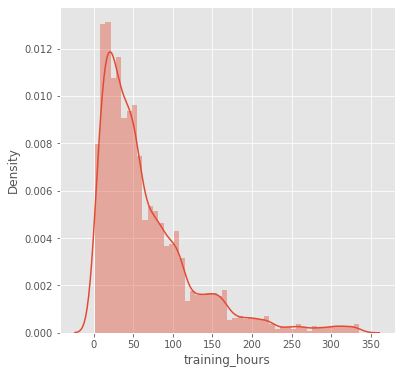

In [8]:
plt.figure(figsize=(6,6))
sns.distplot(data['training_hours'])
plt.show()

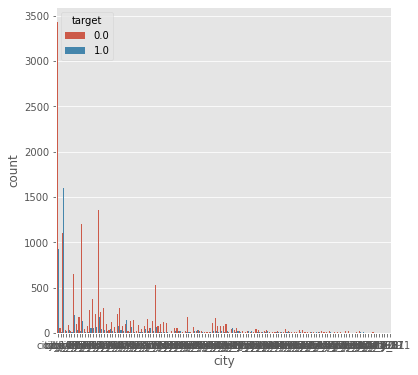

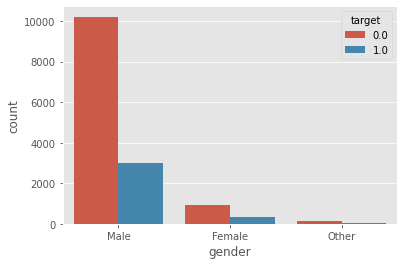

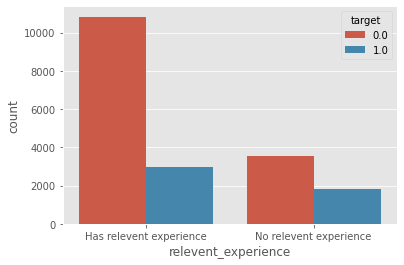

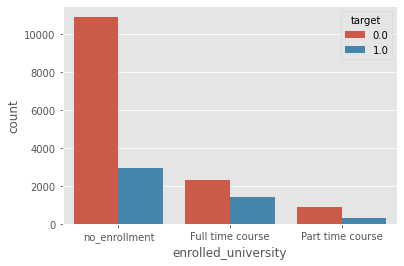

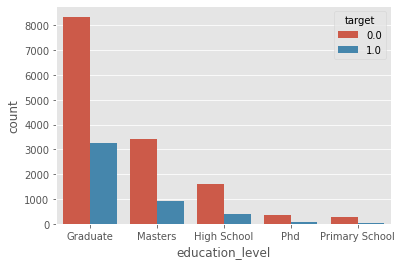

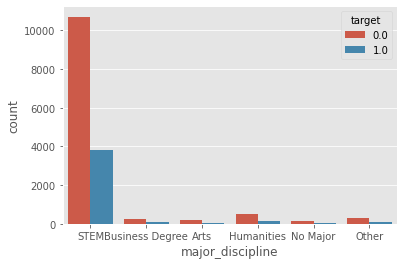

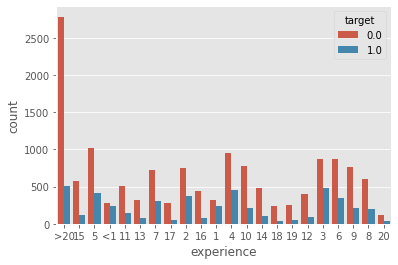

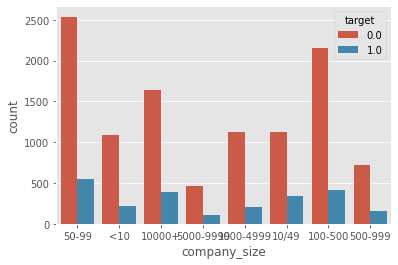

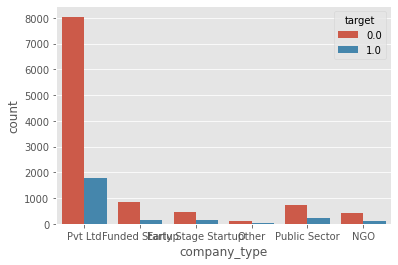

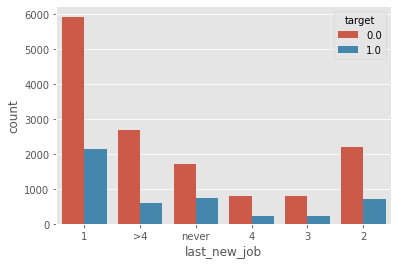

In [9]:
plt.figure(figsize=(6,6))
for i in cat_data:
    sns.countplot(i, hue='target', data=data)
    plt.show()

in major_discipline STEM will override other values

In [10]:
for i in cat_data:
    print(data[[i, 'target']].groupby(i, as_index=False).mean().sort_values('target', ascending=False))
    print('-'*50)

         city    target
54   city_171  1.000000
32   city_139  0.800000
44   city_155  0.785714
79    city_42  0.692308
9    city_107  0.666667
..        ...       ...
25   city_129  0.000000
12   city_111  0.000000
111   city_82  0.000000
108    city_8  0.000000
92    city_62  0.000000

[123 rows x 2 columns]
--------------------------------------------------
   gender    target
0  Female  0.263328
2   Other  0.261780
1    Male  0.227819
--------------------------------------------------
       relevent_experience    target
1   No relevent experience  0.338427
0  Has relevent experience  0.214690
--------------------------------------------------
  enrolled_university    target
0    Full time course  0.380889
1    Part time course  0.252087
2       no_enrollment  0.211406
--------------------------------------------------
  education_level    target
0        Graduate  0.279790
2         Masters  0.214400
1     High School  0.195340
3             Phd  0.140097
4  Primary School  0.1331

## Deal with missing values

In [11]:
# before concat
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
# here we concat test and train set for making changes like fill na values
data = pd.concat([data, test], axis=0).reset_index(drop=True)

In [13]:
# after concat
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

null values in train set are same columns with test set.

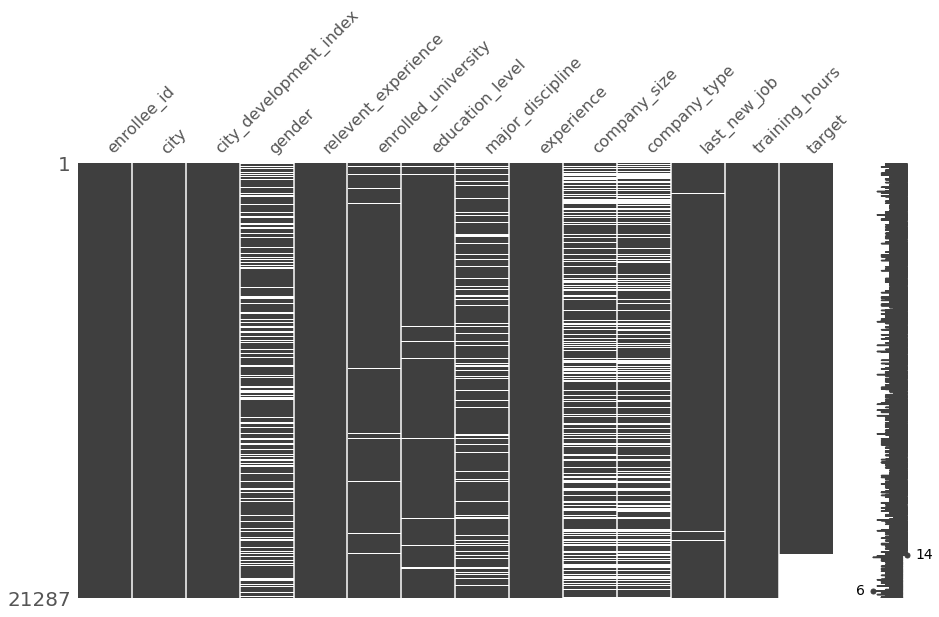

In [14]:
msno.matrix(data, figsize=(15,8))
plt.show()

In [15]:
# drop null values on columns: experience, last_new_job, enrolled_university, education_level
# cause these columns has little null values than other columns
data.dropna(subset=['experience', 'last_new_job', 'enrolled_university', 'education_level'], inplace = True)

In [16]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4306
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2471
experience                   0
company_size              5887
company_type              6055
last_new_job                 0
training_hours               0
target                    2018
dtype: int64

In [17]:
data['major_discipline'].fillna(method='ffill', limit=3, inplace=True)
data['gender'].fillna(method='ffill', limit=2, inplace=True)
data['company_size'].fillna(method='ffill', limit=2, inplace=True)
data['company_type'].fillna(method='ffill', limit=2, inplace=True)

In [18]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                     208
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             3
experience                   0
company_size               486
company_type               515
last_new_job                 0
training_hours               0
target                    2018
dtype: int64

In [19]:
data.dropna(subset=['major_discipline', 'gender', 'company_size', 'company_type'], inplace=True)

In [20]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                    1929
dtype: int64

## Feature engineering

**This part is for encoding categorical data based on value counts of each feature.**<br>
**encoding categorical features is in modeling file v2**

In [21]:
# spliting trian and test set from data to save them
train = data[0:17254]
test = data[17254:].drop('target', axis=1)

In [22]:
print('train data shape: ',train.shape)
print('test data shape: ',test.shape)

train data shape:  (17254, 14)
test data shape:  (1929, 13)


<span style='color:red'><b>Save the Clean dataset to csv file and ready for machine learning modeling </span><br>
<span style='color:red'><b>Version 2 doesn't have encoding in pandas.</span>

In [23]:
train.to_csv('dataset/train_hr_data_cleaned_v2.csv', index=False)
test.to_csv('dataset/test_hr_data_cleaned_v2.csv', index=False)